In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

In [42]:
# Criando o path para onde as iamgens estão
famousim = "imagens_teste/"
# Criando uma lista para adicionar as imagens
famous_images = []

# Fazendo um for loop para iterar sobre todas as imagens
for image in (os.listdir(famousim)): 
    # Adionanco o path com cada imagem para termos o arquivo da imgens
    path = os.path.join(famousim, image)
    # Lendo a imagem
    img = cv2.imread(path)
    # Transformando a imagem em preto e branco 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Adicionando a imgem na lista
    famous_images.append(img)

# Transformando a lista num array
famous_images_np = np.array(famous_images)
print(famous_images_np.shape)

(17, 231, 195)


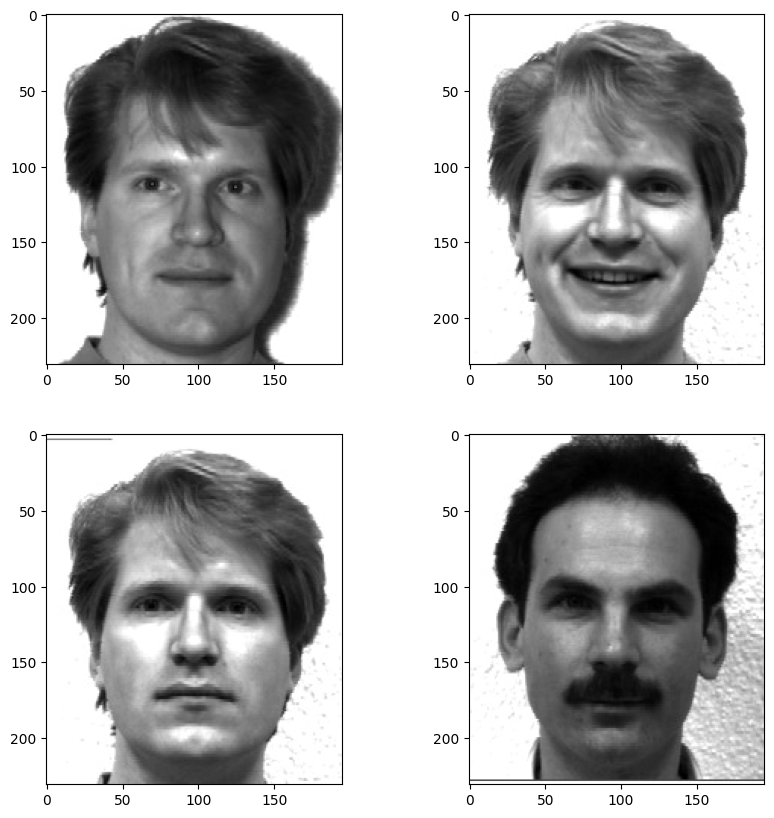

In [43]:
# Plotando a imagem
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].imshow(famous_images_np[0], cmap='gray')
ax[0, 1].imshow(famous_images_np[1], cmap='gray')
ax[1, 0].imshow(famous_images_np[2], cmap='gray')
ax[1, 1].imshow(famous_images_np[3], cmap='gray')

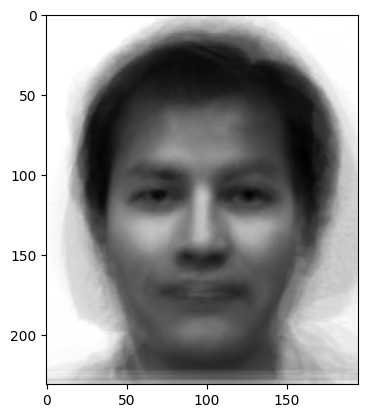

In [45]:
# Cada imagem está armazenada em "3 dimensões", cada foto está numa lista, e cada lista é uma lista de listas
# Vamos transformar a imagem num vetor coluna muito grande.
train_famous_np_matrix = famous_images_np.reshape(famous_images_np.shape[0], famous_images_np.shape[1]*famous_images_np.shape[2])
# calculamos a face média
mean_train_face = np.mean(train_famous_np_matrix, axis=0)
# Criamos uma matriz sem a a face média
centered_train_face = train_famous_np_matrix - mean_train_face

# Mostrando a face média
plt.figure()
plt.imshow(mean_train_face.reshape(231,195), cmap='gray')


In [58]:
U_Face_Famous, D_Face_Famous, V_Face_Famous = np.linalg.svd(centered_train_face, full_matrices=True)

In [60]:
print(D_Face_Famous.shape)
print(U_Face_Famous.shape)
print(V_Face_Famous.shape)

(17,)
(17, 17)
(45045, 45045)
